In [ ]:
Antes era muy dificili trabajar con deep learning

Surjen librerías como TEnsor flow

Keras es una forma que tiene python para trabajar con Tensor FLow de manera más facil.

Tensores son un tipo de estructura de datos que la utilizan librerías multidimensionales



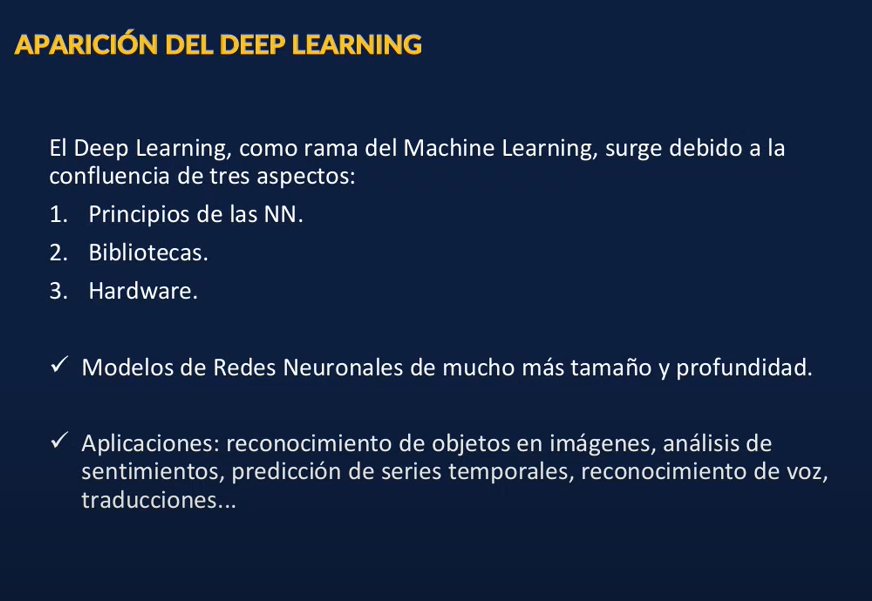

In [1]:
from IPython.display import Image
Image(filename='img/1.PNG')

El tamaño es un aspecto clave para determinar que es el deep learning

Los traductores de textos está basado es deep learning

DeepL esta basado es deep learning
https://www.deepl.com/es/translator

Para poder abordar un proyecto de deep learning necesitamos tener muchos datos. Si no no se saca provecho de los modelos.

Pero el reto es entender lo que esta  pasando por dentro. Entender lo que esta pasando por dentro.



Google es el invento y mantiene **TENSOR FLOW**

Crear un modelo utilizando solo tensor flow es muy dificil, especialmente cuando esta empezando

Para ello se creo **KERAS** que acerca de manera mas amigable procesos de deep learning. Keras te hace de pasarela a las complicaciones y elimina complejidades.



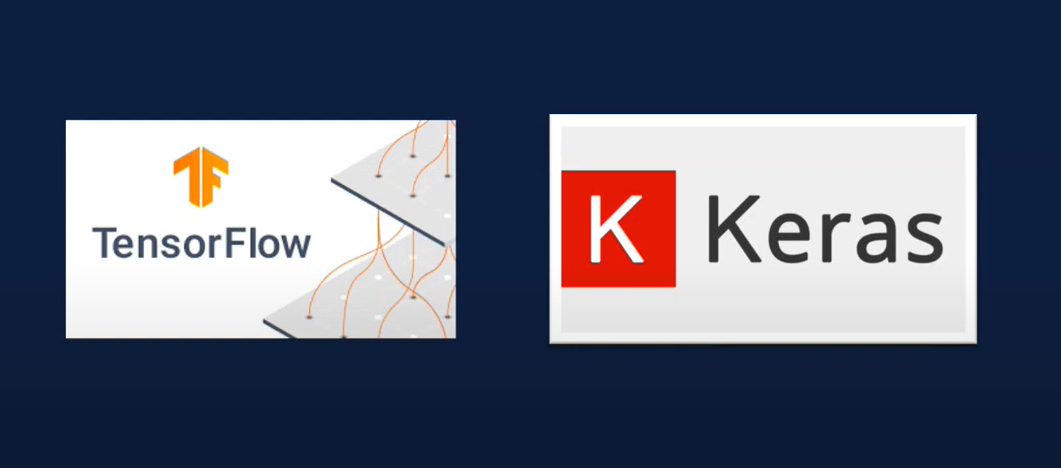

In [2]:
from IPython.display import Image
Image(filename='img/2.PNG')

Los deep neural network son un clasico de las deep learning.

Son simplemente redes neuronales que tienen multiples capas ocultas.

Estan la convulsionales CNN---> trabajan datso no estructurados sin necesidad que el ingeniero hace exploracion de caracteristicas.
Son muy utilizadas en el reconocimiento de imagenens

Redes neuronales recurrentes RNN  ----> LA salida de la red se conecta con la entrada, eso lo que hace que tenga memoria.



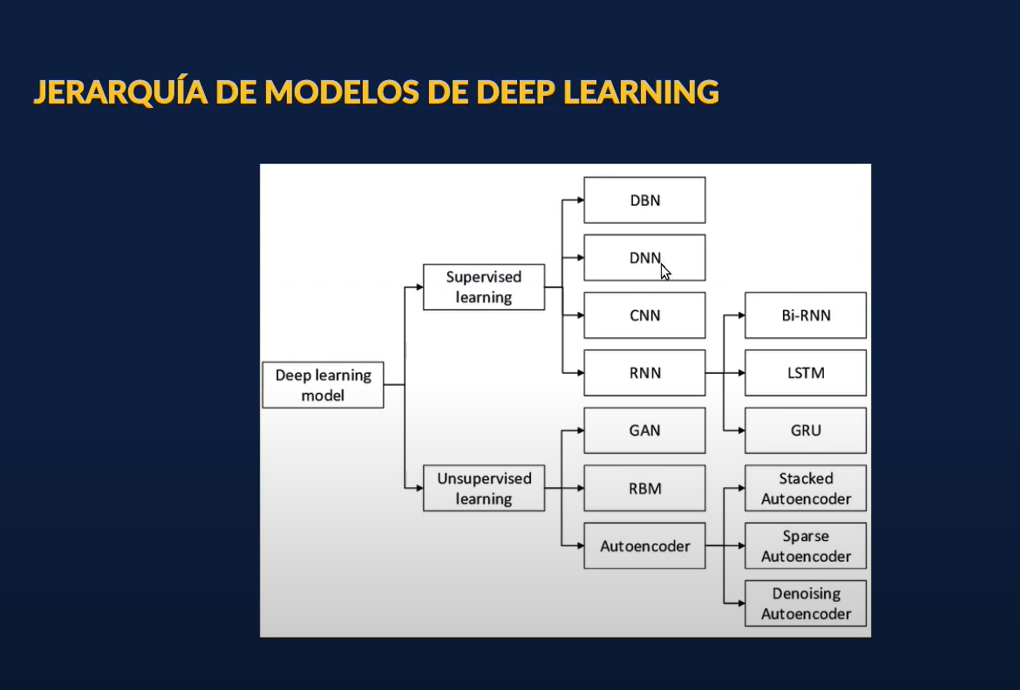

In [3]:
from IPython.display import Image
Image(filename='img/3.PNG')

Esto es una red neuronal normal con varias capas de entrada.

Es un problema de regresion 

Y como es regresion el escalado de datos es importante.

In [13]:
from pandas import read_csv 
import csv

import matplotlib.pyplot as plt 
from matplotlib import ticker 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
import  random, time, numpy 
from sklearn.preprocessing import StandardScaler 

In [26]:
seed=random.seed(time.time()) 
file = 'housing1.csv' 
data = pd.read_csv(file)
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [27]:
X = data[data.columns[:-1]] 
Y = data['MEDV'] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed) 

Aqui es donde realizamos el escalado de datos.

In [28]:
scaler =StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test= scaler.transform(X_test) 

La fisolosia KERAS es definir una especie de contenedor en donde vamos a ir añadiendo capas secuencialmente. Una detras de otra

Una red neuronal no deja de ser una secuancia de capas.

Entonces necesitamos el metodo** Sequential** 

Ese metodo va a ir añadiendo capas al contenedor

Esto lo hace con el modulo**layers** que tienen el metodo **dense**
    Todas la neuronas que metamos adentro vana aestar conectadas con las neuronas de la capa siguiente.
    
Aqui hay hiper parametros para poder configurar.


**input_shape** son la variables de entrada independinetes de nuestro problema

Esto siempre se le indica en la primera 

Y en la ultima capa se pone el numero de capas de salida.

En este caso pongo un  ! porque es un problema de regresion.

SI fuese un problema de calsificacion con tres opciones pongo un tres.

Entre cada linea hay un **Dropput**

Que ocuree cuando una neurona tiene muchas neuronas por capa? Es más tendente al overfiting por ser un modelo tan complejo

Se introduje un a capa que aleatoriamente ponen a = en este casop el 20% de los pesos los pone a =. Elimina esa coneccion para reducir complejidad de lmodelo.

In [30]:
model = keras.Sequential([     
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),     
    layers.Dropout(0.3, seed=seed),     
    layers.Dense(128, activation='swish'),     
    layers.Dense(128, activation='relu'),     
    layers.Dense(128, activation='swish'),     
    #layers.Dropout(0.2, seed=seed),     
    layers.Dense(128, activation='relu'),     
    #layers.Dropout(0.1, seed=seed),     
    layers.Dense(128, activation='swish'),     
    layers.Dense(1,activation='swish') ])

UNa vez creado el contenedor llamo a **compile** para optimizar la funcion de perdida **loss**

Como en este caso es un problema de regresion la funcion de perdida se calcula con ** Mean Square Error**

pero si fuera un problema de clasificaion necesitamos cambiar esta metrica(logLoss)

Investigar para utilizar la funciona de metrica adecuada.

FInalmente la metrica de rendimeinto que queremos que nuestro modelo vaya reportando.

In [31]:
##optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)  
model.compile(loss=tf.keras.losses.MeanSquaredError(),               
              ##optimizer=optimizer,  
              optimizer='adam',
              metrics=['mse']) 

Antes de poner a ejecutar utilizo **sumary** para dar un pequeño adelanto de la red que estoy construyendo.

In [32]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                256       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)              

Ahora realizamos el entrenamiento sobre el conjunto de entrenamiento.

El nuero de epocas y validacion son hiper parametros de la red neuronal.


Esto devuelve **history** Y aqui estará la informacion sobre como ha ido el proceso de entrenamiento.

In [33]:
history = model.fit(     
    X_train, y_train,     
    epochs=100, validation_split=0.4 )

Epoch 1/100
7/7 [==============================] - 2s 52ms/step - loss: 227428270080.0000 - mse: 227428270080.0000 - val_loss: 237554089984.0000 - val_mse: 237554089984.0000
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 227427172352.0000 - mse: 227427172352.0000 - val_loss: 237551222784.0000 - val_mse: 237551222784.0000
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 227421159424.0000 - mse: 227421159424.0000 - val_loss: 237538787328.0000 - val_mse: 237538787328.0000
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 227395256320.0000 - mse: 227395256320.0000 - val_loss: 237487357952.0000 - val_mse: 237487357952.0000
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 227289006080.0000 - mse: 227289006080.0000 - val_loss: 237292142592.0000 - val_mse: 237292142592.0000
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 226958704640.0000 - mse: 226958704640.0000 - val_loss: 23664726

7/7 [==============================] - 0s 8ms/step - loss: 8862683136.0000 - mse: 8862683136.0000 - val_loss: 6866280448.0000 - val_mse: 6866280448.0000
Epoch 50/100
7/7 [==============================] - 0s 8ms/step - loss: 9223778304.0000 - mse: 9223778304.0000 - val_loss: 7305682432.0000 - val_mse: 7305682432.0000
Epoch 51/100
7/7 [==============================] - 0s 9ms/step - loss: 8011860992.0000 - mse: 8011860992.0000 - val_loss: 6526837248.0000 - val_mse: 6526837248.0000
Epoch 52/100
7/7 [==============================] - 0s 9ms/step - loss: 9098260480.0000 - mse: 9098260480.0000 - val_loss: 6801792512.0000 - val_mse: 6801792512.0000
Epoch 53/100
7/7 [==============================] - 0s 10ms/step - loss: 8373841408.0000 - mse: 8373841408.0000 - val_loss: 6874170880.0000 - val_mse: 6874170880.0000
Epoch 54/100
7/7 [==============================] - 0s 10ms/step - loss: 8697817088.0000 - mse: 8697817088.0000 - val_loss: 6557904384.0000 - val_mse: 6557904384.0000
Epoch 55/100
7/

7/7 [==============================] - 0s 9ms/step - loss: 7700451328.0000 - mse: 7700451328.0000 - val_loss: 5608734208.0000 - val_mse: 5608734208.0000
Epoch 99/100
7/7 [==============================] - 0s 11ms/step - loss: 6852837376.0000 - mse: 6852837376.0000 - val_loss: 5636143104.0000 - val_mse: 5636143104.0000
Epoch 100/100
7/7 [==============================] - 0s 12ms/step - loss: 6844160512.0000 - mse: 6844160512.0000 - val_loss: 6135962112.0000 - val_mse: 6135962112.0000


In [34]:
model_history = pd.DataFrame(history.history) 
model_history['epoch'] = history.epoch

In [ ]:
Al fianl es lo mismo , aui se llama **evaluate** pero es lo mismo que predict.

In [35]:
loss, mse = model.evaluate(X_test, y_test, verbose=0) 

print('RMSE = {:.2f}'.format(numpy.sqrt(mse)))

RMSE = 72983.90
